# Exploração dos dados do sistema elétrico

In [1]:
import geopandas as gpd

linhas_path = '../data/raw/electrical_grid/Linhas_de_Transmissão_-_Base_Existente.shp'
linhas_gdf = gpd.read_file(linhas_path)

subestacoes_path = '../data/raw/electrical_grid/Subestações_-_Base_Existente.shp'
subestacoes_gdf = gpd.read_file(subestacoes_path)

states_path = '../data/raw/state_lines/BR_UF_2024.shp'
states_gdf = gpd.read_file(states_path)

print("Dados da rede elétrica carregados com sucesso!")

Dados da rede elétrica carregados com sucesso!


In [2]:

if 'linhas_gdf' in locals() and 'subestacoes_gdf' in locals():
    print("\n--- Linhas de Transmissão ---")
    print(f"Sistema de Coordenadas (CRS): {linhas_gdf.crs}")
    print(f"Número de Linhas: {len(linhas_gdf)}")
    print("Colunas:", list(linhas_gdf.columns))
    print("\nHead:")
    print(linhas_gdf.head())

    print("\n--- Subestações ---")
    print(f"Sistema de Coordenadas (CRS): {subestacoes_gdf.crs}")
    print(f"Número de Subestações: {len(subestacoes_gdf)}")
    print("Colunas:", list(subestacoes_gdf.columns))
    print("\nHead:")
    print(subestacoes_gdf.head())


--- Linhas de Transmissão ---
Sistema de Coordenadas (CRS): EPSG:4674
Número de Linhas: 2094
Colunas: ['Nome', 'Concession', 'Tensao', 'Extensao', 'Ano_Opera', 'created_us', 'created_da', 'last_edite', 'last_edi_1', 'Shape_STLe', 'geometry']

Head:
                                                Nome  \
0  LT 500 kV Ventos de Santa Eugênia - Gentio do ...   
1                   LT 230 kV Açu III - Simplice, C1   
2            LT 230 kV Palmeiras - UTE Palmeiras, C1   
3  LT 230 kV Ventos do Piauí II - Curral Novo do ...   
4            LT 230 kV Alegrete 2 - Uruguaiana 5, C1   

                                          Concession  Tensao    Extensao  \
0                                         OSLO I S/A   500.0   59.649553   
1  TAESA - TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRI...   230.0   52.481310   
2  PALMEIRAS CEPASA - Central Energética Palmeira...   230.0    0.620382   
3                                                  -   230.0    4.593088   
4  CEEE GT - Companhia Estadual d

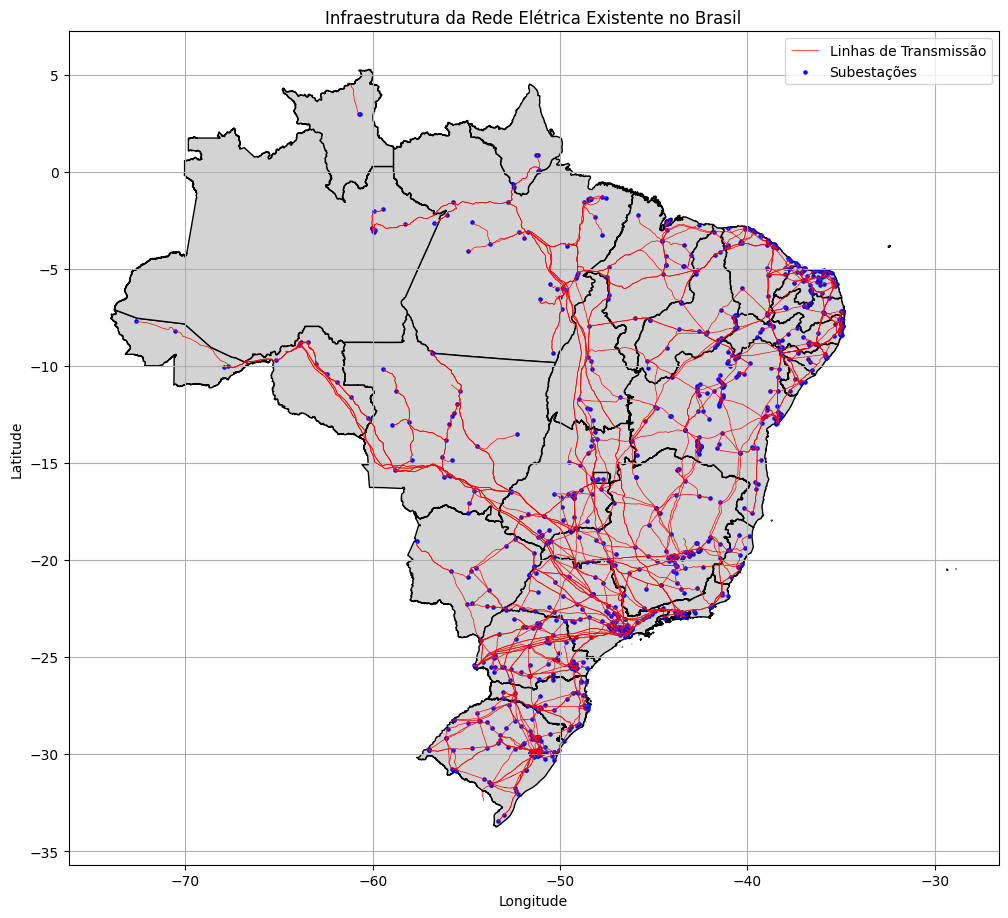

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

states_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

linhas_gdf.plot(ax=ax, color='red', linewidth=0.5, label='Linhas de Transmissão')

subestacoes_gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Subestações')

ax.set_title('Infraestrutura da Rede Elétrica Existente no Brasil')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
print("--- Nomes das Linhas de Transmissão ---")
for name in linhas_gdf['Nome'].head(10):
    print(name)

print("\n--- Nomes das Subestações ---")
for name in subestacoes_gdf['Nome'].head(10):
    print(name)


--- Nomes das Linhas de Transmissão ---
LT 500 kV Ventos de Santa Eugênia - Gentio do Ouro II, C1
LT 230 kV Açu III - Simplice, C1
LT 230 kV Palmeiras - UTE Palmeiras, C1
LT 230 kV Ventos do Piauí II - Curral Novo do Piauí II, C1
LT 230 kV Alegrete 2 - Uruguaiana 5, C1
LT 230 kV Passo Fundo - Vila Maria, C1
LT 500 kV UHE Itaipu - Margem Direita, C3
LT 230 kV Figueira - Mauá, C1
LT 230 kV São João do Piauí - Picos, C1
LT 230 kV Barro Alto - Águas Lindas, C1

--- Nomes das Subestações ---
SE Abdon Batista
SE Abunã
SE Açailândia
SE Acaraú II
SE Açu II
SE Açu III
SE Adrianópolis
SE Água Azul
SE Água Vermelha
SE Águas Lindas


In [5]:
# O mapa me lembrou um grafo,será que encontramos cliques?
import networkx as nx
import re

substation_name_map = {name.replace('SE ', ''): name for name in subestacoes_gdf['Nome']}
clean_substation_names = list(substation_name_map.keys())

G = nx.Graph()
G.add_nodes_from(list(subestacoes_gdf['Nome']))
print(f"Grafo criado com {G.number_of_nodes()} nós (subestações).")

edges_added = 0
for line_name in linhas_gdf['Nome']:
    connected_nodes_clean = []
    for clean_name in clean_substation_names:
        if re.search(r'\b' + re.escape(clean_name) + r'\b', line_name, re.IGNORECASE):
            connected_nodes_clean.append(clean_name)
    
    if len(connected_nodes_clean) == 2:
        original_node_1 = substation_name_map[connected_nodes_clean[0]]
        original_node_2 = substation_name_map[connected_nodes_clean[1]]
        G.add_edge(original_node_1, original_node_2)
        edges_added += 1

print(f"Adicionadas {edges_added} arestas (linhas de transmissão) ao grafo.")

if edges_added > 0:
    cliques = list(nx.find_cliques(G))
    significant_cliques = [clique for clique in cliques if len(clique) >= 3]
    significant_cliques.sort(key=len, reverse=True)

    print(f"\nEncontradas {len(significant_cliques)} cliques significativas (3+ subestações):")
    for i, clique in enumerate(significant_cliques[:10]):
        print(f"  Clique #{i+1} (Tamanho: {len(clique)}): {clique}")
else:
    print("\nNenhuma clique encontrada pois nenhuma aresta foi adicionada. Verifique os padrões de nome.")

Grafo criado com 887 nós (subestações).
Adicionadas 1324 arestas (linhas de transmissão) ao grafo.

Encontradas 98 cliques significativas (3+ subestações):
  Clique #1 (Tamanho: 3): ['SE Vespasiano 2', 'SE Itabira 5', 'SE Neves 1']
  Clique #2 (Tamanho: 3): ['SE Campo Grande 2', 'SE Rio Brilhante', 'SE Imbirussú']
  Clique #3 (Tamanho: 3): ['SE Sapeaçu', 'SE Poções III', 'SE Morro do Chapéu II']
  Clique #4 (Tamanho: 3): ['SE Sapeaçu', 'SE Poções III', 'SE Ibicoara']
  Clique #5 (Tamanho: 3): ['SE Sapeaçu', 'SE Camaçari II', 'SE Olindina']
  Clique #6 (Tamanho: 3): ['SE Sapeaçu', 'SE Camaçari II', 'SE Camaçari IV']
  Clique #7 (Tamanho: 3): ['SE Sapeaçu', 'SE Camaçari II', 'SE Governador Mangabeira']
  Clique #8 (Tamanho: 3): ['SE Sapeaçu', 'SE Santo Antônio de Jesus', 'SE Funil']
  Clique #9 (Tamanho: 3): ['SE Abaiara', 'SE Bom Nome', 'SE Milagres']
  Clique #10 (Tamanho: 3): ['SE Quinta', 'SE Pelotas 3', 'SE Presidente Médici']


2088 linhas de alta tensão (>= 230 kV).


C:\Users\JPMar\AppData\Local\Temp\ipykernel_2348\2411968306.py:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_total_linhas = buffer_linhas.unary_union
C:\Users\JPMar\AppData\Local\Temp\ipykernel_2348\2411968306.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_total_subestacoes = buffer_subestacoes.unary_union


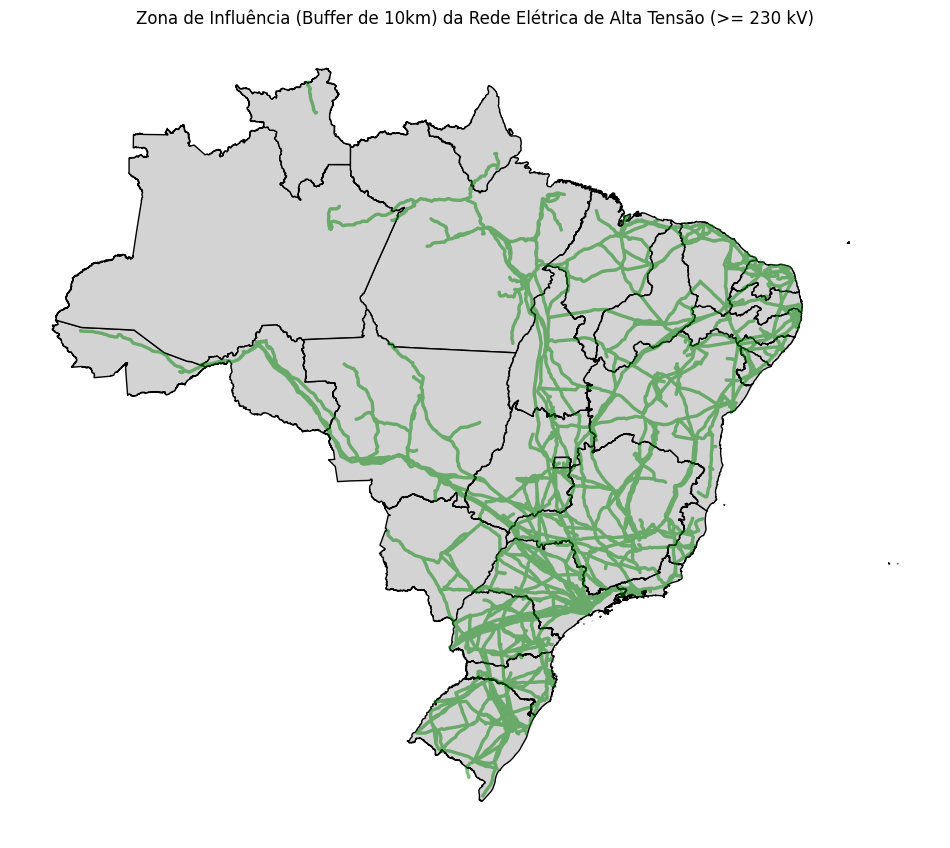

In [ ]:
import pandas as pd

# Reprojetar para um CRS que use metros
linhas_proj = linhas_gdf.to_crs(epsg=31983)
subestacoes_proj = subestacoes_gdf.to_crs(epsg=31983)
states_proj = states_gdf.to_crs(epsg=31983)


# Filtrar os dados
linhas_proj['Tensao_num'] = pd.to_numeric(linhas_proj['Tensao'], errors='coerce')
linhas_alta_tensao = linhas_proj[linhas_proj['Tensao_num'] >= 230].copy()
print(f"{len(linhas_alta_tensao)} linhas de alta tensão (>= 230 kV).")


# Criar e Unir Buffers
# Criar buffers de 10 km ao redor das linhas e subestações
buffer_linhas = linhas_alta_tensao.buffer(10000)
buffer_subestacoes = subestacoes_proj.buffer(10000)

# Unindo os buffers individuais em um único polígono para cada conjunto
# Anteriormente os passos estavam trocados o que levou ao travamento do computador
buffer_total_linhas = buffer_linhas.unary_union
buffer_total_subestacoes = buffer_subestacoes.unary_union

# Unindo os dois conjuntos de buffers
buffer_final = buffer_total_linhas.union(buffer_total_subestacoes)


# Visualização do Resultado

fig, ax = plt.subplots(figsize=(12, 12))
states_proj.plot(ax=ax, color='lightgray', edgecolor='black')
gpd.GeoSeries([buffer_final]).plot(ax=ax, color='green', alpha=0.5)

ax.set_title('Zona de Influência (Buffer de 10km) da Rede Elétrica de Alta Tensão (>= 230 kV)')
ax.set_axis_off()
plt.show()

In [9]:
# Salvar o Buffer Processado

try:
    buffer_gdf = gpd.GeoDataFrame(geometry=[buffer_final], crs='EPSG:31983')
    
    # Salvar em um novo arquivo na pasta 'processed'
    output_path = '../data/processed/buffer_rede_eletrica_10km.gpkg'
    buffer_gdf.to_file(output_path, driver='GPKG')
    print(f"Arquivo salvo com sucesso em: {output_path}")

except Exception as e:
    print(f"Ocorreu um erro ao salvar o arquivo: {e}")

Arquivo salvo com sucesso em: ../data/processed/buffer_rede_eletrica_10km.gpkg
